${\bf{\text{Table of Contents}}}$
$\newline$
- [$\bf{\text{Data Loading and Creating Noisy Image}}$](#1)
$\newline$
- [${\bf{\text{Metrics}}}$](#2)
$\newline$
$\newline$
$\newline$
$\newline$
$\newline$

In [3]:
import os
import cv2
import pywt
import numpy as np
from termcolor import colored
import matplotlib.pyplot as plt
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio, mean_squared_error

In [2]:
path_str = os.getcwd() + '/'
img_name = 'cameraman.jpg'

$\newline$
- <a name='1'>${\bf{\text{Data Loading and Creating Noisy Image}}}$</a>
$\newline$

In [4]:
def min_max_scaler(input_img: np.ndarray, data_range: tuple=(0, 1)) -> np.ndarray:
    img = input_img.copy()
    a, b = data_range[0], data_range[1]
    img = (img - img.min()) / (img.max() - img.min())
    img *= (b - a)
    img += a
    return img

In [5]:
img_orig_gray_ndarray = cv2.imread(path_str + img_name, 0)
img_orig_gray_ndarray = min_max_scaler(img_orig_gray_ndarray)
img_orig_gray_ndarray = img_orig_gray_ndarray.astype(np.float32)

img_noisy_ndarray = random_noise(image=img_orig_gray_ndarray, mode='gaussian', seed=0, var=0.01, mean=0)
img_noisy_ndarray = img_noisy_ndarray.astype(np.float32)

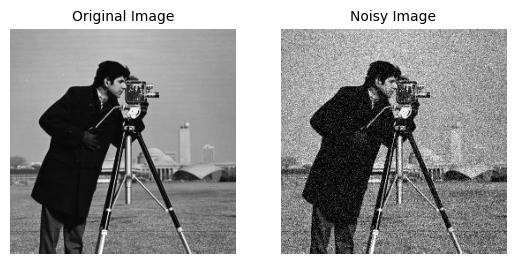

In [6]:
plt.figure(1)
plt.subplot(1, 2, 1), plt.imshow(img_orig_gray_ndarray, cmap='gray'), plt.axis('off'), \
plt.title('Original Image', fontsize=10)
plt.subplot(1, 2, 2), plt.imshow(img_noisy_ndarray, cmap='gray'), plt.axis('off'), \
plt.title('Noisy Image', fontsize=10)
plt.show()

In [7]:
print(f'\n{colored("Original Image", "blue")}: \n\n{img_orig_gray_ndarray}\n')
print(f' ... and {colored("shape", "blue")} of this: {img_orig_gray_ndarray.shape}')
print(f'\n ... and its {colored("data type", "blue")}: {colored(img_orig_gray_ndarray.dtype, "green")}\n')


Original Image: 

[[0.6156863  0.6156863  0.6156863  ... 0.5921569  0.6        0.6039216 ]
 [0.6156863  0.6156863  0.6156863  ... 0.6        0.6        0.6       ]
 [0.61960787 0.61960787 0.61960787 ... 0.60784316 0.6        0.59607846]
 ...
 [0.44313726 0.5294118  0.47843137 ... 0.50980395 0.5294118  0.40784314]
 [0.49803922 0.47058824 0.47843137 ... 0.5254902  0.52156866 0.4862745 ]
 [0.44313726 0.5372549  0.5137255  ... 0.5176471  0.49803922 0.41568628]]

 ... and shape of this: (256, 256)

 ... and its data type: float32



In [8]:
print(f'\n{colored("Noisy Image", "blue")}: \n\n{img_noisy_ndarray}\n')
print(f' ... and {colored("shape", "blue")} of this: {img_noisy_ndarray.shape}')
print(f'\n ... and its {colored("data type", "blue")}: {colored(img_noisy_ndarray.dtype, "green")}\n')


Noisy Image: 

[[0.6282593  0.6024758  0.67972857 ... 0.4999935  0.6804717  0.68919647]
 [0.5489176  0.6320107  0.5326111  ... 0.5291535  0.57096004 0.61429137]
 [0.5652121  0.6062627  0.749395   ... 0.5773632  0.60088617 0.57635045]
 ...
 [0.51911294 0.27266556 0.3699326  ... 0.57211    0.639319   0.48081118]
 [0.5402246  0.5513061  0.49047777 ... 0.63716435 0.6014341  0.42078286]
 [0.49783072 0.6791294  0.5577653  ... 0.44500536 0.5286573  0.4056032 ]]

 ... and shape of this: (256, 256)

 ... and its data type: float32



$\newline$
- <a name='2'>${\bf{\text{Metrics}}}$</a>
$\newline$

In [9]:
def SNR_db(img_orig: np.ndarray, img_noisy: np.ndarray) -> float:
    m, n = img_orig.shape
    num_pixels = m * n
    N = img_noisy - img_orig
    enumerator = np.sum(img_orig ** 2) / num_pixels
    denumerator = np.sum(N ** 2) / num_pixels
    snr_db = 10 * np.log10(enumerator / denumerator)
    return snr_db

In [10]:
X = img_orig_gray_ndarray
X_hat = img_noisy_ndarray

psnr_orig_and_denoised_swt = peak_signal_noise_ratio(image_true=X, \
                                              image_test=X_hat, data_range=1)

print(f'\nType of X: {colored(X.dtype, "blue")}\n')
print(f'Type of X\u0302: {colored(X.dtype, "blue")}\n')
print(f'\n{colored("PSNR", "blue")} without Denoising: {psnr_orig_and_denoised_swt}')

M = X.shape[0] * X.shape[1]
MSE_swt_denoising = np.sum((X - X_hat) ** 2) / (2 * M)
print(f'\n{colored("MSE", "blue")} without Denoising: {MSE_swt_denoising}\n')

MSE_swt_lib = mean_squared_error(X, X_hat)
RMSE_swt_lib = MSE_swt_lib ** 0.5
snr_db = SNR_db(img_orig=X, img_noisy=X_hat)
print(f'\n{colored("MSE", "blue")} without Denoising: {MSE_swt_lib}\n')
print(f'{colored("RMSE", "blue")} without Denoising: {RMSE_swt_lib}\n')
print(f'\n{colored("SNR(db)", "blue")} without Denoising: {snr_db}\n')


Type of X: float32

Type of X̂: float32


PSNR without Denoising: 20.400405933403135

MSE without Denoising: 0.0045596277341246605


MSE without Denoising: 0.00911925598032862

RMSE without Denoising: 0.09549479556671463


SNR(db) without Denoising: 14.816665416002007

